# Flower Classification model

In [1]:
import os
import pandas as pd
from pathlib import Path

# Defining the root directory of training dataset
train_dir = "/kaggle/input/flower-classification/flowers/flowers/flower_photos/train"

# Defining the root directory of validation dataset
validate_dir = "/kaggle/input/flower-classification/flowers/flowers/flower_photos/validation"

# Supported image file extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

# Function to collect image paths and labels from a directory
def collect_images_and_labels(directory):
    image_paths = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for root, _, files in os.walk(class_dir):
                for file in files:
                    if any(file.lower().endswith(ext) for ext in image_extensions):
                        image_paths.append(os.path.join(root, file))
                        labels.append(class_name)
    return image_paths, labels

# Collect images and labels for the training dataset
train_image_paths, train_labels = collect_images_and_labels(train_dir)

# Create a DataFrame for the training dataset
train_df = pd.DataFrame({
    'Image_Path': train_image_paths,
    'Flowers': train_labels
})

# Collect images and labels for the validation dataset
validate_image_paths, validate_labels = collect_images_and_labels(validate_dir)

# Create a DataFrame for the validation dataset
validate_df = pd.DataFrame({
    'Image_Path': validate_image_paths,
    'Flowers': validate_labels
})

# Display the first few rows of each DataFrame
print("Training Dataset:")
print(train_df.head())
print("\nValidation Dataset:")
print(validate_df.head())

# Save the DataFrames to CSV files
train_df.to_csv('/kaggle/working/train_dataset.csv', index=False)
validate_df.to_csv('/kaggle/working/validate_dataset.csv', index=False)

print("Training dataset saved to train_dataset.csv")
print("Validation dataset saved to validate_dataset.csv")

Training Dataset:
                                          Image_Path    Flowers
0  /kaggle/input/flower-classification/flowers/fl...  dandelion
1  /kaggle/input/flower-classification/flowers/fl...  dandelion
2  /kaggle/input/flower-classification/flowers/fl...  dandelion
3  /kaggle/input/flower-classification/flowers/fl...  dandelion
4  /kaggle/input/flower-classification/flowers/fl...  dandelion

Validation Dataset:
                                          Image_Path    Flowers
0  /kaggle/input/flower-classification/flowers/fl...  dandelion
1  /kaggle/input/flower-classification/flowers/fl...  dandelion
2  /kaggle/input/flower-classification/flowers/fl...  dandelion
3  /kaggle/input/flower-classification/flowers/fl...  dandelion
4  /kaggle/input/flower-classification/flowers/fl...  dandelion
Training dataset saved to train_dataset.csv
Validation dataset saved to validate_dataset.csv


## lets look at training dataset

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  3540 non-null   object
 1   Flowers     3540 non-null   object
dtypes: object(2)
memory usage: 55.4+ KB


### Looking at image

Image Size:(500, 333)


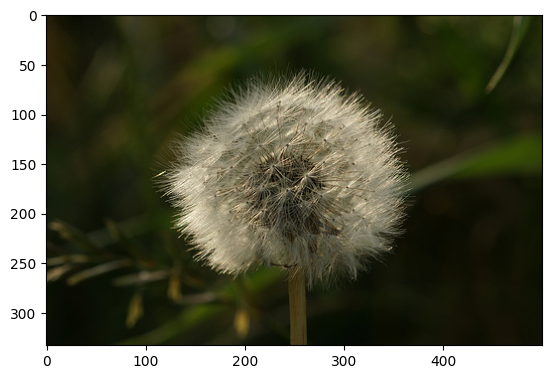

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

def first_image():
    first_image_path = train_df['Image_Path'].iloc[0]
    image = Image.open(first_image_path)
    print(f"Image Size:{image.size}")
    plt.imshow(image)
    plt.show()

first_image()

In [4]:
from PIL import Image

def is_valid_image(Image_Path):
    try:
        img = Image.open(Image_Path)
        img.verify()
        return True
        
    except(IOError, SyntaxError):
        return False

train_df = train_df[train_df['Image_Path'].apply(is_valid_image)]
train_df

,Image_Path,Flowers
0,/kaggle/input/flower-classification/flowers/fl...,dandelion
1,/kaggle/input/flower-classification/flowers/fl...,dandelion
2,/kaggle/input/flower-classification/flowers/fl...,dandelion
3,/kaggle/input/flower-classification/flowers/fl...,dandelion
4,/kaggle/input/flower-classification/flowers/fl...,dandelion
...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips
3536,/kaggle/input/flower-classification/flowers/fl...,tulips
3537,/kaggle/input/flower-classification/flowers/fl...,tulips
3538,/kaggle/input/flower-classification/flowers/fl...,tulips


### Removing Duplicate Images:

In [5]:
from imagehash import average_hash

def compute_hash(Image_Path):
    img = Image.open(Image_Path)
    return average_hash(img)

train_df['image_hash'] = train_df['Image_Path'].apply(compute_hash) 
train_df = train_df.drop_duplicates(subset=["image_hash"])
train_df = train_df.drop(columns=["image_hash"])

train_df

,Image_Path,Flowers
0,/kaggle/input/flower-classification/flowers/fl...,dandelion
1,/kaggle/input/flower-classification/flowers/fl...,dandelion
2,/kaggle/input/flower-classification/flowers/fl...,dandelion
3,/kaggle/input/flower-classification/flowers/fl...,dandelion
4,/kaggle/input/flower-classification/flowers/fl...,dandelion
...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips
3536,/kaggle/input/flower-classification/flowers/fl...,tulips
3537,/kaggle/input/flower-classification/flowers/fl...,tulips
3538,/kaggle/input/flower-classification/flowers/fl...,tulips


### Resize Images

In [6]:
from PIL import Image
import numpy as np

def resize_image(Image_Path, size=(224, 224)):
    img = Image.open(Image_Path)
    img = img.resize(size)
    return np.array(img)

train_df['image'] = train_df["Image_Path"].apply(resize_image)

train_df

,Image_Path,Flowers,image
0,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[38, 30, 11], [37, 29, 10], [35, 28, 9], [33..."
1,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[158, 162, 163], [160, 164, 167], [162, 165,..."
2,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[212, 198, 0], [210, 196, 0], [209, 192, 0],..."
3,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[2, 44, 1], [2, 42, 3], [4, 76, 2], [2, 73, ..."
...,...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[155, 96, 126], [157, 98, 128], [158, 99, 12..."
3536,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
3537,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3538,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[97, 114, 104], [93, 110, 102], [98, 117, 11..."


### Normalising the image

In [7]:
import numpy as np

def normalize_image(image):
    return np.array(image)/255.0 # Normalize to [0,1]
train_df["image"] = train_df['image'].apply(normalize_image)

# Visualizing Clean vs.unclean dataset

In [8]:
import pandas as pd

unclean_trained_df = pd.read_csv("/kaggle/working/train_dataset.csv")
# downsizing and converting image_paths to pixel image array in unclean_trained_df

def load_and_convert(Image_Path, size=(224, 224)):
    img = Image.open(Image_Path)
    img = img.resize(size)
    return np.array(img)

unclean_trained_df['image'] = unclean_trained_df['Image_Path'].apply(lambda x: load_and_convert(x))
unclean_trained_df

,Image_Path,Flowers,image
0,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[38, 30, 11], [37, 29, 10], [35, 28, 9], [33..."
1,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[158, 162, 163], [160, 164, 167], [162, 165,..."
2,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[212, 198, 0], [210, 196, 0], [209, 192, 0],..."
3,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,/kaggle/input/flower-classification/flowers/fl...,dandelion,"[[[2, 44, 1], [2, 42, 3], [4, 76, 2], [2, 73, ..."
...,...,...,...
3535,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[155, 96, 126], [157, 98, 128], [158, 99, 12..."
3536,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
3537,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3538,/kaggle/input/flower-classification/flowers/fl...,tulips,"[[[97, 114, 104], [93, 110, 102], [98, 117, 11..."


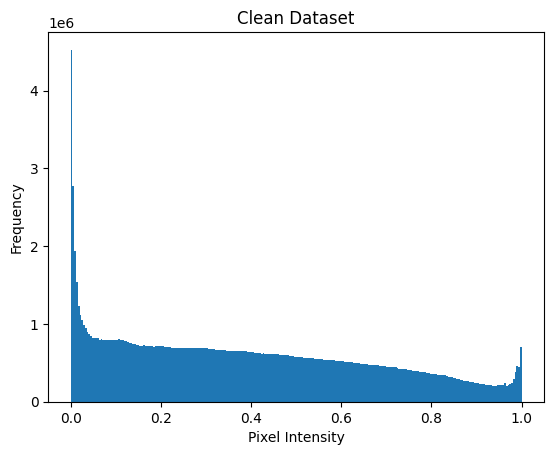

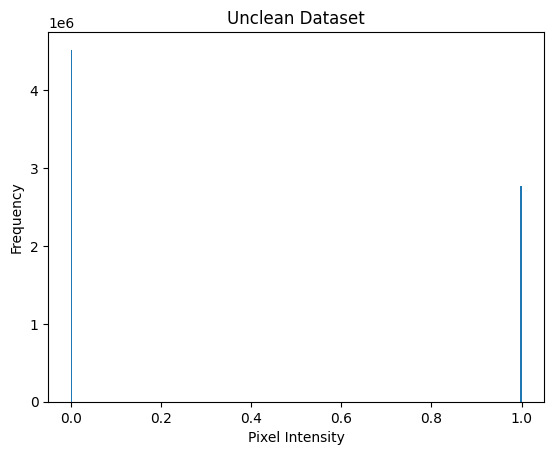

In [9]:
def plot_pixel_intensity(df, title, sample_size=1000):
    all_pixels = []
    
    # Use a generator to process images one at a time
    def pixel_generator():
        for img in df['image']:
            yield img.flatten()
    
    # Collect pixels from the generator
    pixel_gen = pixel_generator()
    for _ in range(min(sample_size, len(df))):
        all_pixels.append(next(pixel_gen))
    
    # Combine pixels
    all_pixels = np.concatenate(all_pixels)
    
    # Plot histogram
    plt.hist(all_pixels, bins=256, range=(0, 1))
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_pixel_intensity(train_df, 'Clean Dataset')
plot_pixel_intensity(unclean_trained_df, 'Unclean Dataset')

t-SNE Visualization

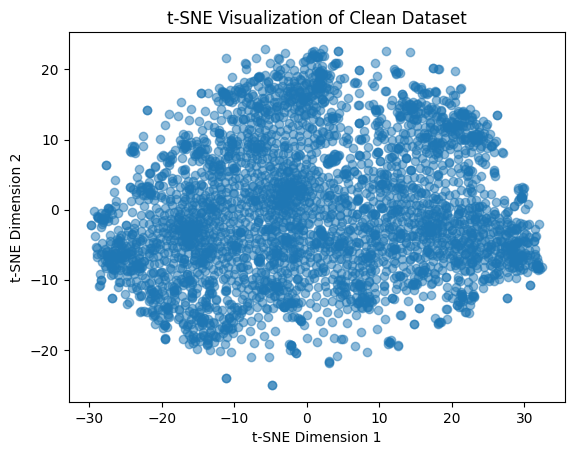

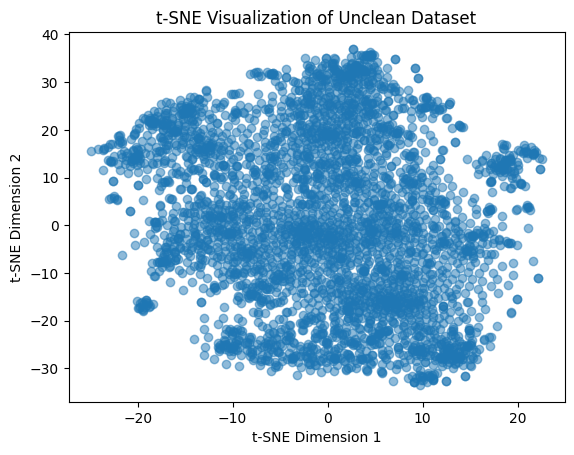

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def preprocess_data(df, column_name):
    """
    Preprocess the data by flattening images and handling potential issues.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the dataset.
    column_name (str): The name of the column containing the images.
    
    Returns:
    np.ndarray: A 2D array of flattened feature vectors.
    """
    features = []
    for img in df[column_name]:
        # Check if the image is a valid NumPy array
        if isinstance(img, np.ndarray):
            # Flatten the image and add to the features list
            features.append(img.flatten())
        else:
            # Handle invalid or missing data (e.g., by skipping or filling with zeros)
            print(f"Warning: Invalid or missing data found. Skipping this entry.")
            features.append(np.zeros((1, 1)).flatten())  # Replace with a zero vector or handle as needed
    
    return np.array(features)

def apply_tsne(features, title):
    """
    Apply t-SNE to the feature vectors and plot the results.
    
    Parameters:
    features (np.ndarray): A 2D array of flattened feature vectors.
    title (str): The title for the plot.
    """
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # perplexity is a hyperparameter
    reduced_data = tsne.fit_transform(features)
    
    # Plot the t-SNE results
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

# Example usage with clean dataset
# Assume df_clean is a DataFrame with a column 'image' containing NumPy arrays
features_clean = preprocess_data(train_df, 'image')
apply_tsne(features_clean, 't-SNE Visualization of Clean Dataset')

# Example usage with unclean dataset
# Assume df_unclean is a DataFrame with a column 'image' containing potentially invalid data
features_unclean = preprocess_data(unclean_trained_df, 'image')
apply_tsne(features_unclean, 't-SNE Visualization of Unclean Dataset')

# Model Training

Since the data set is already divided into 